# Lab 7. Image Processing
This lab sheet aims to help us understand more about image processing, as we are going to study this
new topic, and use it to solve 3 problems, which will be divided into the following tasks:
1. The face detection problem
2. The image segmentation problem
3. The object recognition problem

## Task 7.1 Face Detection
###Problem Description

This first task presents us with a face detection problem, which is the basis for any type of image processing that includes faces. For this problem, we will use the Haar cascade face detector method, so we can find and analyse faces when given a certain input image to explore.

There are many other face recognition methods developed, but even though the Haar cascade face detector is probably not the most accurate one, is currently the fastest one.

In order to successfully perform face recognition, the Haar cascade face detector uses rectangle features, which are patterns that will help to find out the edges of the lines in an input image, as well as some possible abrupt changes when it comes to the pixels involved, so in other words, these features will work to represent local image characteristics. At the same time, these features will analyse a face, and identify the contrast between the eyes and the surrounding face (it should be expected that the eye region is darker than the cheek area), by using these rectangles positioned over the area of the eyes and also over the cheek area (while calculating the difference between the sum of pixel values in between these two regions). The same technique is applied to the eyes and nose areas, in which, again, these adjacent rectangles will be placed in these areas, where the pixel comparisons will be made when it comes to darker and lighter regions (two eyes darker than nose bridge). We can see these features in the figure below taken from the lecture.

![Figure 1](https://github.com/LeomPina/AIreports/blob/main/w8_7.1.1.png?raw=true)

Figure 1

This model also uses a cascade of classifiers technique, in which sub-windows will be accepted or rejected. So this mechanism will quickly and effectively eliminate regions of the image that do not contain any faces, which will be very useful since most of the input image will be rejected. This will help to save computation and resources when analysing the image.

Therefore, these techniques will be the key to getting quick and effective results.

##Implementation and results
This section shows the implemented code and its respective output.

In [ ]:
!pip install opencv-python
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Load the face detection model from the model file
!wget 'https://github.com/yongminli/data/raw/main/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

--2023-11-07 01:40:52--  https://github.com/yongminli/data/raw/main/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yongminli/data/main/haarcascade_frontalface_default.xml [following]
--2023-11-07 01:40:53--  https://raw.githubusercontent.com/yongminli/data/main/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2023-11-07 01:40:53 (23.4 MB/s) - ‘haarcascade_frontalf

In [ ]:
# Load the model file and image files to Google Colab
from google.colab import files
file = files.upload()

Saving w8_7.1.6.jpg to w8_7.1.6.jpg


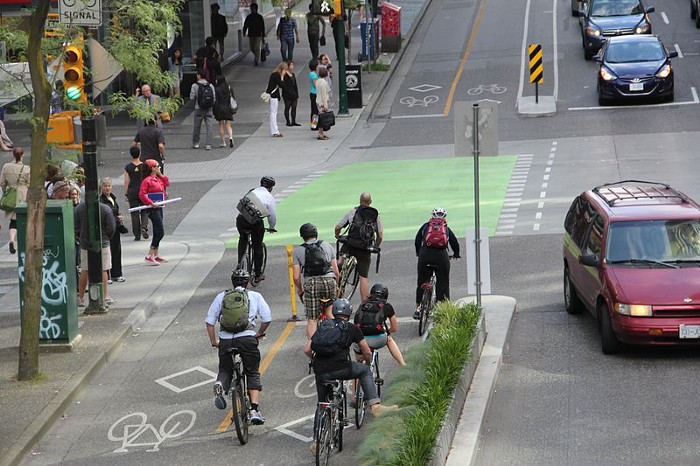

In [ ]:
# Read an input image
img = cv2.imread('w8_7.1.6.jpg')

# Convert it into a grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
# faces = face_cascade.detectMultiScale(image=gray, scaleFactor=1.2, minNeighbors=5, minSize=(50,50))
faces = face_cascade.detectMultiScale(image=gray, minNeighbors=5)

# Display the detecition results
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2_imshow(img)

## Discussions

To solve this problem, the OpenCV library was used, as it is a popular library for image processing and computer vision, and also provides lots of important tools and functions that were useful in this lab. The online documentation can be found at https://pypi.org/project/opencv-python/.

The files used in this lab can be found at https://drive.google.com/drive/folders/1vf9INW8CBx7LH5R-YD2RS7uwqeAtBpjv?usp=sharing.

For this first case, we will test the trained model of the Haar cascade face detector, by using a "clear" image as input when it comes to face detection, in which the intention here is to see the algorithm perform quickly and successfully, as the faces in the image are frontal, the lighting is bright, and the people presented are easily identified. The detection will then occur with the detectMultiScale() function, implemented in the solution shown in the previous section.

In the following figure, we can see a photo of students, which will be used as input for this case.

![Figure 2](https://github.com/LeomPina/AIreports/blob/main/w8_7.1.2.jpg?raw=true)

Figure 2

The figure below presents an image of the result outputted by the program.

![Figure 3](https://github.com/LeomPina/AIreports/blob/main/w8_7.1.3.png?raw=true)

Figure 3

By analysing the result, we can see that the method performed as intended, and therefore the result can be considered accurate, as this resulting image has got all the faces correctly identified.

For this second case, we will test the trained model of the Haar cascade face detector, by using a photo of a cat as input, which obviously is not human, but still presents a face. The face displayed in the image is still frontal, and the lighting is also still bright.

In the following figure, we can see an image of both the input that will be used for this case, as well as the result outputted by the program.

![Figure 4](https://github.com/LeomPina/AIreports/blob/main/w8_7.1.4_.jpg?raw=true)

Figure 4

By analysing the figure above, we can see that the input and the output images are equal, which means that the method was not able to identify the face of the animal, as this method is used mostly for identifying human traits, and not animal or objects.

For this final case, we will test the trained model of the Haar cascade face detector, by using an image of a street as input, in which there are lots of different elements, such as many objects and people. The faces displayed in the image are not frontal, and the lighting is darker.

The figure below presents an image of both the input that will be used for this case, as well as the result outputted by the program.

![Figure 5](https://github.com/LeomPina/AIreports/blob/main/w8_7.1.6.jpg?raw=true)

Figure 5

By looking at the result, we can see that, once again, the input and the output images are equal, which means that the method was not able to identify the faces of the people presented.

## Task 7.2 Image Segmentation
###Problem Description

This next task presents an image segmentation problem, in which we will partition an image into meaningful regions. This is a well-known topic in the world of image processing and computer vision.

To perform image segmentation, we will use the R-CNN model, which is a high-level segmentation method. This method works toward outlining the boundaries of objects within an image while combining object recognition and segmentation. So this model, after successfully identifying the objects and their boundaries, will present these boundaries, along with creating bounding boxes for each one of these objects or regions identified. It is also important to notice that the model chosen, along with its training data, are key elements for its performance when dealing with these images.

For this problem, we will use a pre-built R-CNN model (mask_rcnn_coco.h5).

##Implementation and results
This section shows the implemented code and its respective output.

In [ ]:
#Mount Google drive to read the files from
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/data/"

Mounted at /content/drive


In [ ]:
!pip install pixellib
import pixellib
from pixellib.instance import instance_segmentation
import cv2
from google.colab.patches import cv2_imshow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.3/430.3 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


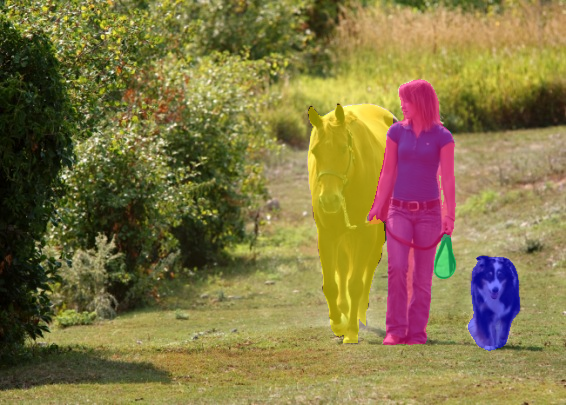

In [ ]:
import torch
import pixellib
from pixellib.torchbackend.instance import instanceSegmentation

model = instanceSegmentation()
model.load_model(path + "pointrend_resnet50.pkl")
# model.segmentImage(path + "segment.jpg", show_bboxes=False, output_image_name="/content/gdrive/MyDrive/Datasets/CS5707/data/image_path_out.jpg")
segmask, output = model.segmentImage(path + "objects.jpg", show_bboxes=False)
cv2_imshow(output)

In [ ]:
# img = cv2.imread("/content/gdrive/MyDrive/Datasets/CS5707/data/image_path_out.jpg")
# cv2_imshow(img)

## Discussions
To solve this problem, the PixelLib package was used, which is used for image and video segmentation. The online documentation can be found at https://pixellib.readthedocs.io/en/latest/.

For this first case, we will test the trained R-CNN model, by using an image of a street as input, the same image used in the previous task (Figure 5), which can be considered a quite "complex" image. The image segmentation will then occur with the model.segmentImage() function, implemented in the solution shown in the previous section.

The figure below presents an image of the result outputted by the program.

![Figure 6](https://github.com/LeomPina/AIreports/blob/main/w8_7.2.1.png?raw=true)

Figure 6

By looking at the result, we can see that the model performed as intended, as the model was able to correctly identify most objects, and then clearly represent their boundaries in the resulting outputted image.

For this second case, we will test the trained R-CNN model, by using a photo of a person and some animals in a field scenario, which will give us lots of different elements to test and analyse.

In the following figure, we can see the image that will be used as input for this case.

![Figure 7](https://github.com/LeomPina/AIreports/blob/main/w8_7.2.2.jpg?raw=true)

Figure 7

The figure below presents an image of the result outputted by the program.

![Figure 8](https://github.com/LeomPina/AIreports/blob/main/w8_7.2.3.png?raw=true)

Figure 8

By analysing the result, we can see that the model performed as expected, as, once again, the model was able to correctly identify the objects, as well as the living entities presented, and then clearly represent their boundaries in the resulting outputted image.

So we can say that this model was overall successful when it comes to image segmentation and identifying most object boundaries while also being able to identify distinct elements in the images provided.

## Task 7.3 Object Recognition
###Problem Description

This last task presents the topic of object recognition, which is also a very important topic when it comes to image processing and computer vision. So this method will allow us to identify different object categories when analysing an image (or video), while only scanning the input image once.

To perform object recognition, we will use the YOLO model (considered one of the best for this purpose), which is different than any type of R-CNN model. So this model, in order to perform object recognition, uses an image as input, which is then applied to a neural network. At the same time, various regions will be identified in the image, in a grid format, which will then predict bounding boxes and class probabilities. These bounding boxes will correspond to a certain class, and will display a label.

##Implementation and results
This section shows the implemented code and its respective output.

In [ ]:
!pip install cvlib
import cvlib
from cvlib.object_detection import draw_bbox, YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 66.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046370 sha256=d9c953f608d68f22890710f2bf459088840abcb6546f79f01535f8a08c2d2b0d
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=4f0bac7e408845c3da59261d775451e1c49d0687d84a0b0575f1081324c1ddb4
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


In [ ]:
# Download the YOLOv3 model configuration, weights and labels files
# !wget https://github.com/yongminli/data/raw/main/yolov3-tiny.cfg -O yolov3-tiny.cfg
# !wget https://github.com/yongminli/data/raw/main/yolov3-tiny.weights -O yolov3-tiny.weights
# !wget https://github.com/yongminli/data/raw/main/yolov3.txt -O yolov3.txt

# !wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.cfg -O yolov3.cfg
# !wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.weights -O yolov3.weights
# !wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.txt -O yolov3.txt
# path = ""

# Alternatively you can save the data to your Google Drive, and load the data from there
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/data/"


Mounted at /content/drive


In [ ]:
# The default YOLO model files
#config = path + 'yolov3.cfg'
#weights = path + 'yolov3.weights'
#labels = path + 'yolov3.txt'

# # Alternative the "tiny" version of YOLO, which is faster but less accurate
config = path + 'yolov3-tiny.cfg'
weights = path + 'yolov3-tiny.weights'
labels = path + 'yolov3.txt'

# Construct the YOLOv3 Model
yolo = YOLO(weights, config, labels)


[INFO] Initializing YOLO ..


In [ ]:
# # Load the image files to Google Colab
# from google.colab import files
# file = files.upload()

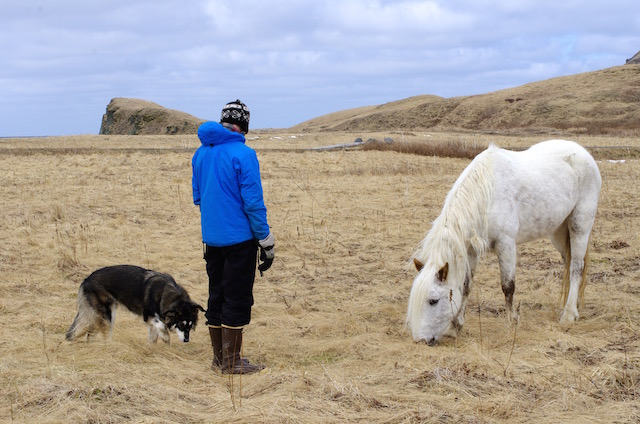

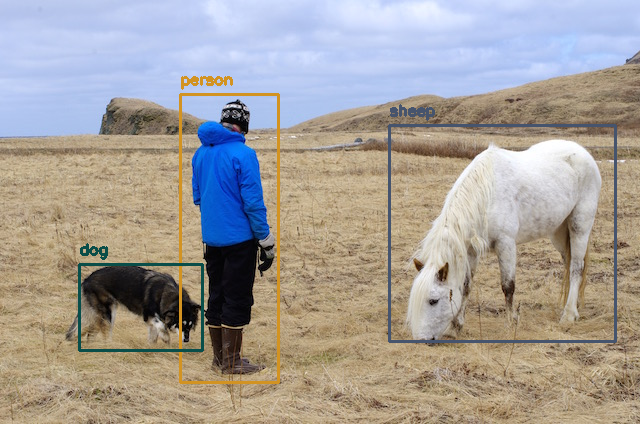

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read an image file
img = cv2.imread(path+'objects2.jpg')
# img = cv2.imread(path+'objects2.jpg')
cv2_imshow(img)
print()

# Detect objects from the image, and display the results
bbox, label, conf = yolo.detect_objects(img)
# bbox, label, conf = yolo.detect_objects(img, confidence=0.25, nms_thresh=0.2)
yolo.draw_bbox(img, bbox, label, conf)
cv2_imshow(img)

## Discussions
To solve this problem, the cvlib package was used, which is used for object detection. The online documentation can be found at https://www.cvlib.net/.

For this first case, we will test the default YOLO version model, which is more accurate but slower. For this case we will test two different images as inputs, the first will be an image of a person and some animals in a green field scenario, the same image used in the previous task (Figure 7). The second image will be, once again, an image of a person, this time facing backward, and some animals in a mountain field scenario. The object detection will occur with the yolo.detect_objects() function, implemented in the solution shown in the previous section.

The figure below presents the image of the result outputted by the program for this first case when inputting the first image mentioned above.

![Figure 9](https://github.com/LeomPina/AIreports/blob/main/w8_7.3.1.png?raw=true)

Figure 9

By looking at the resulting figure above, we can notice that the model performed as intended, as the model was able to correctly identify the objects (the living entities) and label them adequately while displaying the bounding boxes with the correct class identifier.

In the following figure, we can see the image that will be used as the second input for this first case.

![Figure 10](https://github.com/LeomPina/AIreports/blob/main/w8_7.3.2.jpg?raw=true)

Figure 10

The figure below presents an image of the corresponding result outputted by the program.

![Figure 11](https://github.com/LeomPina/AIreports/blob/main/w8_7.3.3.png?raw=true)

Figure 11

By analysing the result, we can see that the model performed as expected, as, once again, the model was able to correctly identify the objects (the living entities), and label them adequately.

For this second case, we will test the tiny YOLO version model, which is less accurate but faster. For this case, we will test as input the same images used in the first case.

The figure below presents an image of the corresponding result outputted by the program, for the first inputted image (Figure 7), when using this new model.

![Figure 12](https://github.com/LeomPina/AIreports/blob/main/w8_7.3.4.png?raw=true)

Figure 12

By looking at the image above, we can notice that this algorithm was not able to correctly identify nor label all the elements present in the picture, as the horse presented in the image was not even identified or classified, on the other hand, the dog was both identified and classified two times.

The figure below presents an image of the corresponding result outputted by the program, for the second inputted image (Figure 10), when using this new model.

![Figure 13](https://github.com/LeomPina/AIreports/blob/main/w8_7.3.5.png?raw=true)

Figure 13

By analysing the resulting image, we can notice that, once more, this algorithm wrongly identified and labelled certain elements in the image, the horse in particular, which was identified but classified as a sheep, which is a wrong label.

This difference in results for these two cases studied (when using the default and tiny YOLO version models) were predictable, because, as we mentioned before, these two models present different performing mechanisms, as the first one (default YOLO) is more accurate but slower. The size of these models is also worth mentioning, as the default version is approximately 250MB, and the tiny one is 35MB, these are aspects that can be reflected in the results produced. We can also notice that the tiny version is probably more adequate for real-time applications, while the default version is more suitable if we are looking for higher accuracy results and time is not as important.

#Conclusion

In conclusion, after completing this Lab work by solving its tasks and problems, we can agree that by using all these methods, such as the Haar cascade detector, the R-CNN model, and the YOLO models, we were able to find a solution for these 3 tasks. By doing so, we gained additional knowledge on how these tools and methods can be applied to solve image processing problems, and how these can be useful for different scenarios.

In further investigations, we could study more about other image processing methods, while also exploring how these are applied in real-life scenarios, as image processing is such an intriguing and popular topic in today's life. Moreover, we could also expand our studies to video analysis problems, with the use of, for example, R-CNN and YOLO models, and even extend our investigations to machine learning and deep learning areas.